In [1]:
#Declaracion de bibliotecas
import skfuzzy
import numpy 
import matplotlib.pyplot as plt

In [2]:
variableSensor = int(input("Ingrese el valor de la temperatura del sensor: "))

#ETAPA DE FUZIFICACIÓN
#Primero generamos los universos
universoTemperaturas = numpy.arange(0,61,1)
universoVelocidades = numpy.arange(0,101,1)

#Posteriormente generamos los conjuntos difusos
conjuntoTemperaturaBaja = skfuzzy.trapmf(universoTemperaturas, [0,0,12,18])
conjuntoTemperaturaNormal = skfuzzy.trapmf(universoTemperaturas, [11,20,22,29])
conjuntoTemperaturaAlta = skfuzzy.trapmf(universoTemperaturas, [22,30,60,60])

conjuntoVelocidadIDisminuye = skfuzzy.trimf(universoVelocidades, [0,0,50])
conjuntoVelocidadMantiene = skfuzzy.trimf(universoVelocidades, [0,50,100])
conjuntoVelocidadIncrementa = skfuzzy.trimf(universoVelocidades, [50,100,100])

#Despues vamos a generar los grados de pertenencia 


                         #universo, conjunto difuso, datoEspecifico
gradosPertenenciaTB = skfuzzy.interp_membership(universoTemperaturas,conjuntoTemperaturaBaja, variableSensor) 
gradosPertenenciaTN = skfuzzy.interp_membership(universoTemperaturas,conjuntoTemperaturaNormal, variableSensor)
gradosPertenenciaTA = skfuzzy.interp_membership(universoTemperaturas,conjuntoTemperaturaAlta, variableSensor)


#Si la temperatura es alta entonces se debe incrementar la velocidad del ventilador
reglaActivacion1 = gradosPertenenciaTA
velocidadIncrementa = numpy.fmin(reglaActivacion1, conjuntoVelocidadIncrementa)  

#Si la temperatura es media entonces se debe mantener la velocidad
reglaActivacion2 = gradosPertenenciaTN
velocidadMantiene = numpy.fmin(reglaActivacion2, conjuntoVelocidadMantiene)  

#Si la temperatura es baja entonces se debe reducir la velocidad
reglaActivacion3 = gradosPertenenciaTB
velocidadDisminuye = numpy.fmin(reglaActivacion3, conjuntoVelocidadIDisminuye)  

#Nota: Que pasa si tengo una regla4 en donde tengo dos entradas y estan conectadas por un y
#regla4 = numpy.fmin(gradoPertenciaE1,gradoPertenciaE2)

#Posteriormente debo de crear una formula que me permita combinar 
#todos los grados de pertenencia de mis reglas individuales
#utilizar el conector OR

reglasCombinadas = numpy.fmax(velocidadDisminuye,
                     numpy.fmax(velocidadMantiene, velocidadIncrementa))




Ingrese el valor de la temperatura del sensor:  13


101


In [3]:
#ETAPA3: DEFUZIFICACION

#universo, funcionGradosPertenencia, ModoCalculo
velocidadVentilador = skfuzzy.defuzz(universoVelocidades, reglasCombinadas, 'centroid')
print(velocidadVentilador)

33.496909610014775


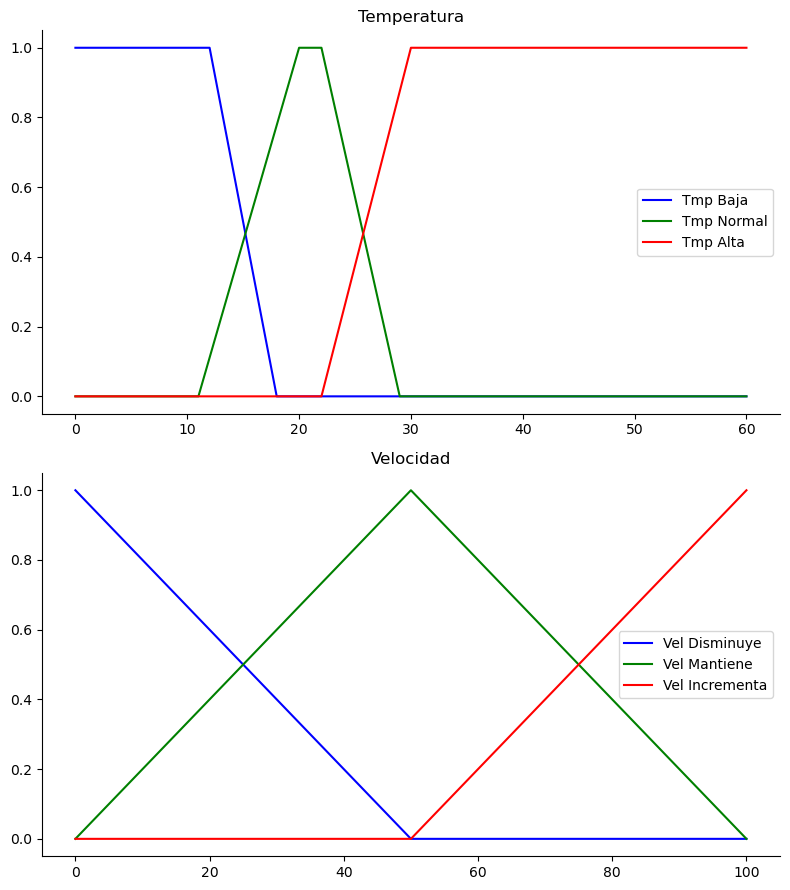

In [4]:
# Visualize these universes and membership functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(universoTemperaturas, conjuntoTemperaturaBaja, 'b', linewidth=1.5, label='Tmp Baja')
ax0.plot(universoTemperaturas, conjuntoTemperaturaNormal, 'g', linewidth=1.5, label='Tmp Normal')
ax0.plot(universoTemperaturas, conjuntoTemperaturaAlta, 'r', linewidth=1.5, label='Tmp Alta')
ax0.set_title('Temperatura')
ax0.legend()

ax1.plot(universoVelocidades, conjuntoVelocidadIDisminuye, 'b', linewidth=1.5, label='Vel Disminuye')
ax1.plot(universoVelocidades, conjuntoVelocidadMantiene, 'g', linewidth=1.5, label='Vel Mantiene')
ax1.plot(universoVelocidades, conjuntoVelocidadIncrementa, 'r', linewidth=1.5, label='Vel Incrementa')
ax1.set_title('Velocidad')
ax1.legend()

# Turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

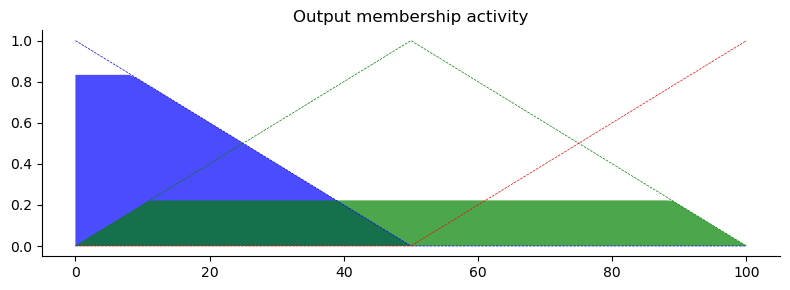

In [6]:
vel0 = numpy.zeros_like(universoVelocidades)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(universoVelocidades, vel0, velocidadDisminuye, facecolor='b', alpha=0.7)
ax0.plot(universoVelocidades, conjuntoVelocidadIDisminuye, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(universoVelocidades, vel0, velocidadMantiene, facecolor='g', alpha=0.7)
ax0.plot(universoVelocidades, conjuntoVelocidadMantiene, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(universoVelocidades, vel0, velocidadIncrementa, facecolor='r', alpha=0.7)
ax0.plot(universoVelocidades, conjuntoVelocidadIncrementa, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
vel_activation = skfuzzy.interp_membership(universoVelocidades, reglasCombinadas, velocidadVentilador)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(universoVelocidades, conjuntoVelocidadIDisminuye, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(universoVelocidades, conjuntoVelocidadMantiene, 'g', linewidth=0.5, linestyle='--')
ax0.plot(universoVelocidades, conjuntoVelocidadIncrementa, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(universoVelocidades, vel0, reglasCombinadas, facecolor='Orange', alpha=0.7)
ax0.plot([velocidadVentilador, velocidadVentilador], [0, vel_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()